# Movie Data eda

- What is the problem you are seeking to answer?
 - What is the problem you are seeking to answer?
 - Business insights: This can help movie companies optimize their budgets to maximize profits while ensuring audience satisfaction.
  - Stakeholder: Movie companies seeking to maximize profit
- Make a logical case for the possibility of multiple outcomes.
 - Higher budget -> More advertisement -> More viewers -> **More ratings**
  - Higher budget -> No budget allocated to marketing -> **No impact on ratings**
  - Higher budget -> More advertisement and less on quality of movie -> **Lower rating**
  - Lower budget -> Good quality of production -> **Better rating**
- What is the ideal experiment to examine the issue?
 - Regression. Two sample testing
- Present descriptive statistics/visualizations describing
your data and the important relationships.
  - ...

In [2]:
import pandas as pd
import os
pd.set_option('display.max_columns', None)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
os.chdir('/content/drive/MyDrive/DSO 510 group/Project/data')

In [25]:
title_ratings = pd.read_csv('title.ratings.tsv', sep='\t')
title_ratings.head()

,tconst,averageRating,numVotes
0,tt0000001,5.7,2100
1,tt0000002,5.6,282
2,tt0000003,6.5,2118
3,tt0000004,5.4,182
4,tt0000005,6.2,2850


In [26]:
df = pd.read_csv('TMDB_movie_dataset_v11.csv')
df.head()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,budget,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,160000000,https://www.warnerbros.com/movies/inception,tt1375666,en,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc..."
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,165000000,http://www.interstellarmovie.net/,tt0816692,en,Interstellar,The adventures of a group of explorers who mak...,140.241,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,..."
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,185000000,https://www.warnerbros.com/movies/dark-knight/,tt0468569,en,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.643,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f..."
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,237000000,https://www.avatar.com/movies/avatar,tt0499549,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.932,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ..."
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,220000000,https://www.marvel.com/movies/the-avengers,tt0848228,en,The Avengers,When an unexpected enemy emerges and threatens...,98.082,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com..."


## Merge with IMDB

In [27]:
df = df.merge(title_ratings, left_on='imdb_id', right_on='tconst')


In [28]:
df.shape

(435549, 27)

In [29]:
df.release_date = pd.to_datetime(df.release_date)

In [30]:
df.release_date.describe()

,release_date
count,416964
mean,1994-07-29 10:14:36.507324544
min,1874-12-09 00:00:00
25%,1979-08-07 00:00:00
50%,2005-03-13 00:00:00
75%,2015-10-11 00:00:00
max,2029-10-13 00:00:00


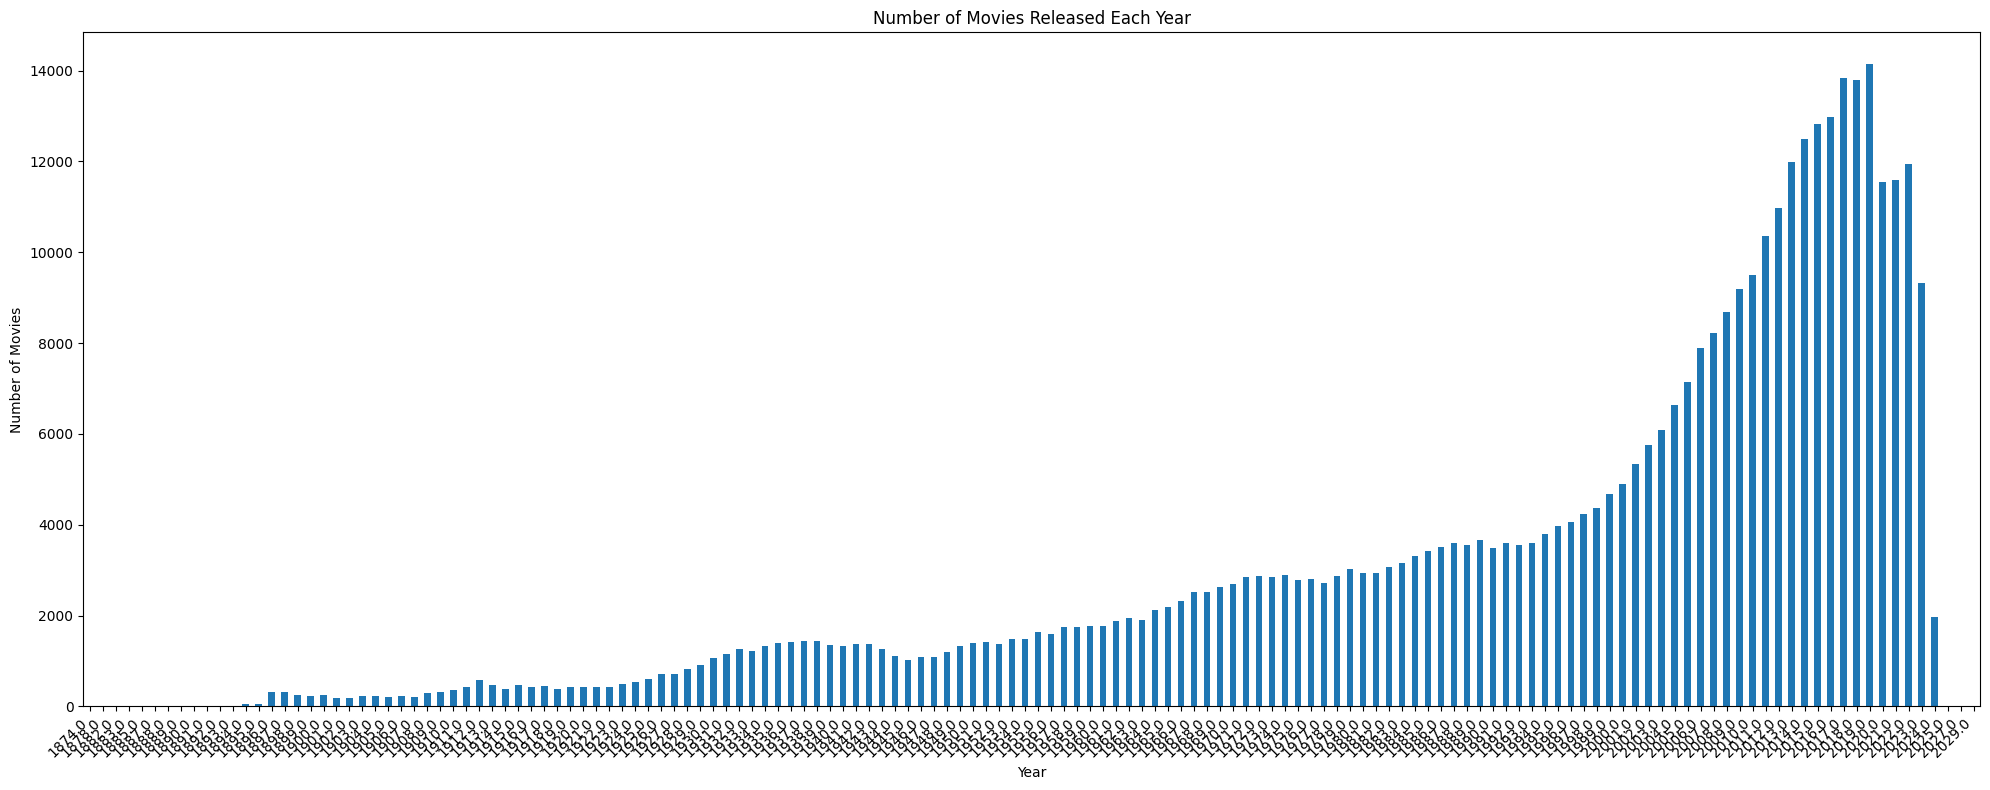

In [31]:
# prompt: could you do plot of the rows by year

import matplotlib.pyplot as plt

# Extract year from release_date
df['year'] = df['release_date'].dt.year

# Group by year and count rows
rows_by_year = df.groupby('year').size()

# Create the plot
plt.figure(figsize=(20, 8))
rows_by_year.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.title('Number of Movies Released Each Year')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


In [32]:
df = df[(df.year >= 2000) & (df.year <= 2025)]
df.head()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,budget,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords,tconst,averageRating,numVotes,year
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,160000000,https://www.warnerbros.com/movies/inception,tt1375666,en,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc...",tt1375666,8.8,2611469,2010.0
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,165000000,http://www.interstellarmovie.net/,tt0816692,en,Interstellar,The adventures of a group of explorers who mak...,140.241,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,...",tt0816692,8.7,2193642,2014.0
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,185000000,https://www.warnerbros.com/movies/dark-knight/,tt0468569,en,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.643,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f...",tt0468569,9.0,2942753,2008.0
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,237000000,https://www.avatar.com/movies/avatar,tt0499549,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.932,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ...",tt0499549,7.9,1408115,2009.0
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,220000000,https://www.marvel.com/movies/the-avengers,tt0848228,en,The Avengers,When an unexpected enemy emerges and threatens...,98.082,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com...",tt0848228,8.0,1482940,2012.0


In [33]:
df.shape

(239169, 28)

In [34]:
df = df[df.budget != 0]
df.shape

(21966, 28)

In [35]:
df.head()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,budget,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords,tconst,averageRating,numVotes,year
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,160000000,https://www.warnerbros.com/movies/inception,tt1375666,en,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc...",tt1375666,8.8,2611469,2010.0
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,165000000,http://www.interstellarmovie.net/,tt0816692,en,Interstellar,The adventures of a group of explorers who mak...,140.241,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,...",tt0816692,8.7,2193642,2014.0
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,185000000,https://www.warnerbros.com/movies/dark-knight/,tt0468569,en,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.643,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f...",tt0468569,9.0,2942753,2008.0
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,237000000,https://www.avatar.com/movies/avatar,tt0499549,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.932,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ...",tt0499549,7.9,1408115,2009.0
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,220000000,https://www.marvel.com/movies/the-avengers,tt0848228,en,The Avengers,When an unexpected enemy emerges and threatens...,98.082,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com...",tt0848228,8.0,1482940,2012.0


In [36]:
df.popularity.value_counts()

,count
popularity,
0.600,4806
1.400,375
0.000,240
0.840,108
0.628,34
...,...
13.463,1
6.245,1
11.251,1


In [37]:
df.columns

Index(['id', 'title', 'vote_average', 'vote_count', 'status', 'release_date',
       'revenue', 'runtime', 'adult', 'backdrop_path', 'budget', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'tagline', 'genres',
       'production_companies', 'production_countries', 'spoken_languages',
       'keywords', 'tconst', 'averageRating', 'numVotes', 'year'],
      dtype='object')

In [38]:
df.drop(columns=['vote_average', 'vote_count', 'status', 'backdrop_path', 'homepage',
                 'poster_path', 'tagline','spoken_languages',
                 'keywords', 'tconst'], inplace=True)

In [39]:
df.head()

,id,title,release_date,revenue,runtime,adult,budget,imdb_id,original_language,original_title,overview,popularity,genres,production_companies,production_countries,averageRating,numVotes,year
0,27205,Inception,2010-07-15,825532764,148,False,160000000,tt1375666,en,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America",8.8,2611469,2010.0
1,157336,Interstellar,2014-11-05,701729206,169,False,165000000,tt0816692,en,Interstellar,The adventures of a group of explorers who mak...,140.241,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",8.7,2193642,2014.0
2,155,The Dark Knight,2008-07-16,1004558444,152,False,185000000,tt0468569,en,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.643,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America",9.0,2942753,2008.0
3,19995,Avatar,2009-12-15,2923706026,162,False,237000000,tt0499549,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.932,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom",7.9,1408115,2009.0
4,24428,The Avengers,2012-04-25,1518815515,143,False,220000000,tt0848228,en,The Avengers,When an unexpected enemy emerges and threatens...,98.082,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,8.0,1482940,2012.0


In [40]:
df = df[df.budget > 8000]
df.shape

(17568, 18)

In [42]:
df[df.budget == df.budget.max()]

,id,title,release_date,revenue,runtime,adult,budget,imdb_id,original_language,original_title,overview,popularity,genres,production_companies,production_countries,averageRating,numVotes,year
281861,1057999,Enea,2023-09-21,0,115,False,888000000,tt27219440,it,Enea,Enea chases after the myth he bears in his nam...,4.319,Comedy,"The Apartment Pictures, Vision Distribution, F...",Italy,6.0,893,2023.0


In [43]:
df = df[df.budget <= 300000000]
df.shape

(17560, 18)

In [44]:
df.to_csv("clean_movie_rating.csv")

## Univariate analysis

In [45]:
df.averageRating.describe()

,averageRating
count,17560.000000
mean,6.023685
std,1.461360
min,1.000000
25%,5.200000
50%,6.200000
75%,7.000000
max,10.000000


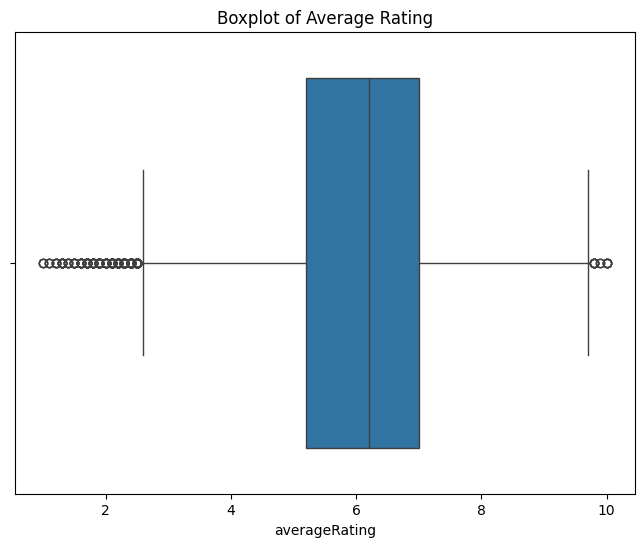

In [46]:
# prompt: Hey create a boxplot of averageRating in df

import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(x=df['averageRating'])
plt.title('Boxplot of Average Rating')
plt.show()


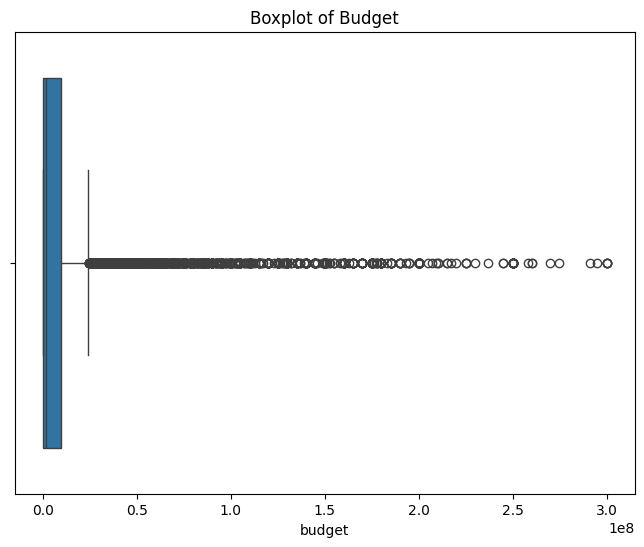

In [47]:
# prompt: Box plot of budget

plt.figure(figsize=(8, 6))
sns.boxplot(x=df['budget'])
plt.title('Boxplot of Budget')
plt.show()


In [48]:
low_budget = df[df.budget < 5000000]
high_budget = df[df.budget >= 5000000]
low_budget.shape, high_budget.shape

((11568, 18), (5992, 18))

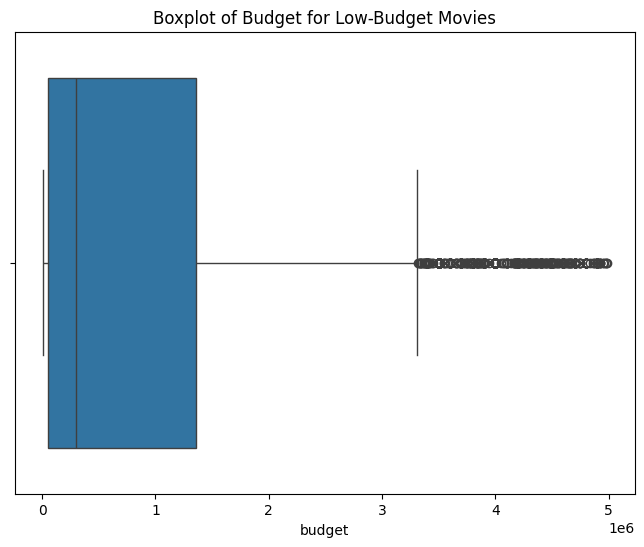

In [49]:
# prompt: box plot of budget for low_budget

plt.figure(figsize=(8, 6))
sns.boxplot(x=low_budget['budget'])
plt.title('Boxplot of Budget for Low-Budget Movies')
plt.show()


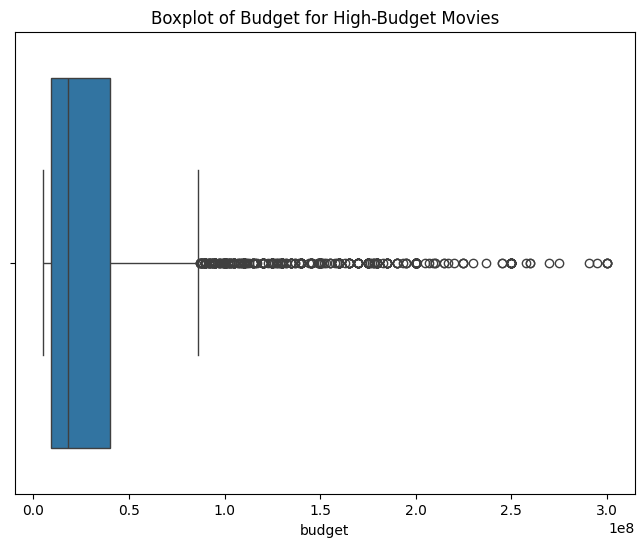

In [50]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=high_budget['budget'])
plt.title('Boxplot of Budget for High-Budget Movies')
plt.show()

## Bivariate analysis

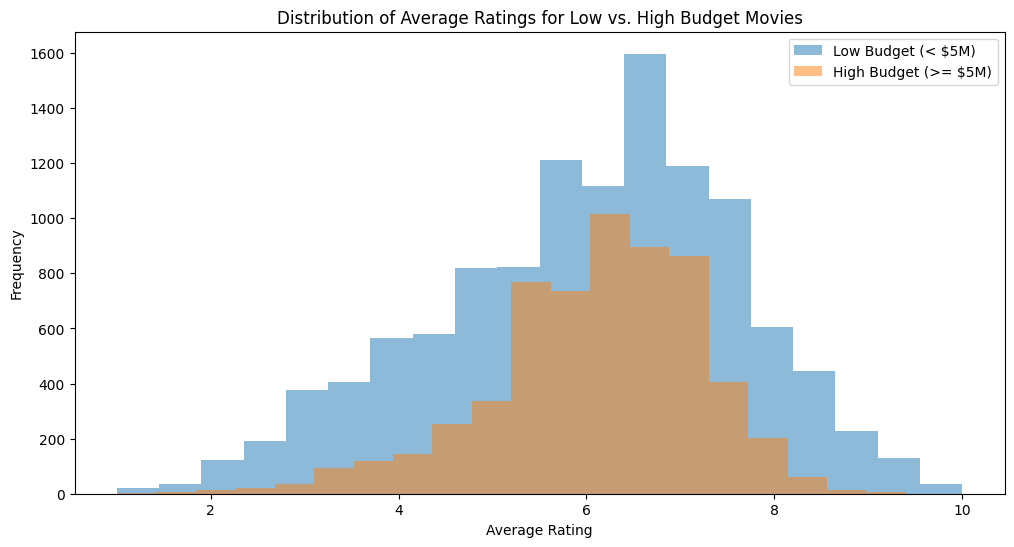

In [51]:
# prompt: hist of low budget and high budget side by side

# Assuming 'low_budget' and 'high_budget' DataFrames are already defined as in the previous code.

plt.figure(figsize=(12, 6))

plt.hist(low_budget['averageRating'], bins=20, alpha=0.5, label='Low Budget (< $5M)')
plt.hist(high_budget['averageRating'], bins=20, alpha=0.5, label='High Budget (>= $5M)')

plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Average Ratings for Low vs. High Budget Movies')
plt.legend()
plt.show()


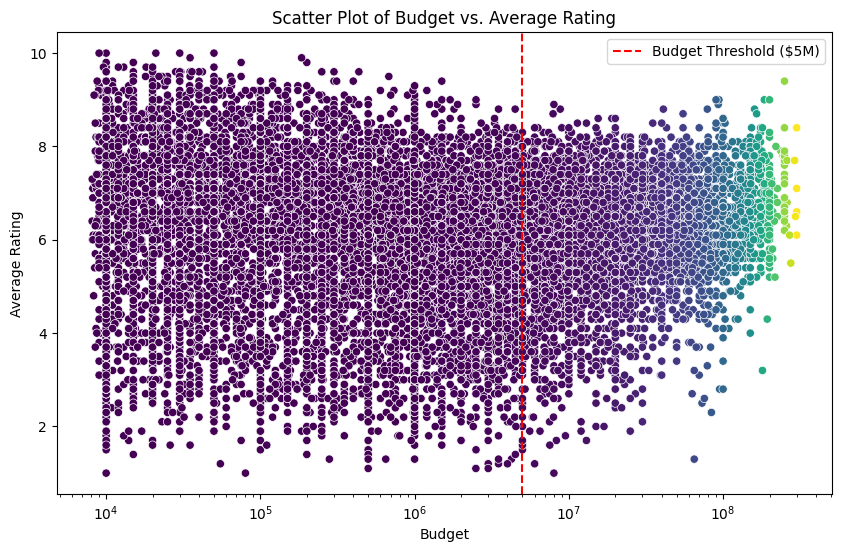

In [52]:
# prompt: scatterplot budget and averageRating between low budget and high budget

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='budget', y='averageRating', hue='budget', palette='viridis', legend=False)
plt.axvline(x=5000000, color='red', linestyle='--', label='Budget Threshold ($5M)')
plt.xlabel('Budget')
plt.ylabel('Average Rating')
plt.title('Scatter Plot of Budget vs. Average Rating')
plt.xscale('log') # Use log scale for better visualization of budget
plt.legend()
plt.show()


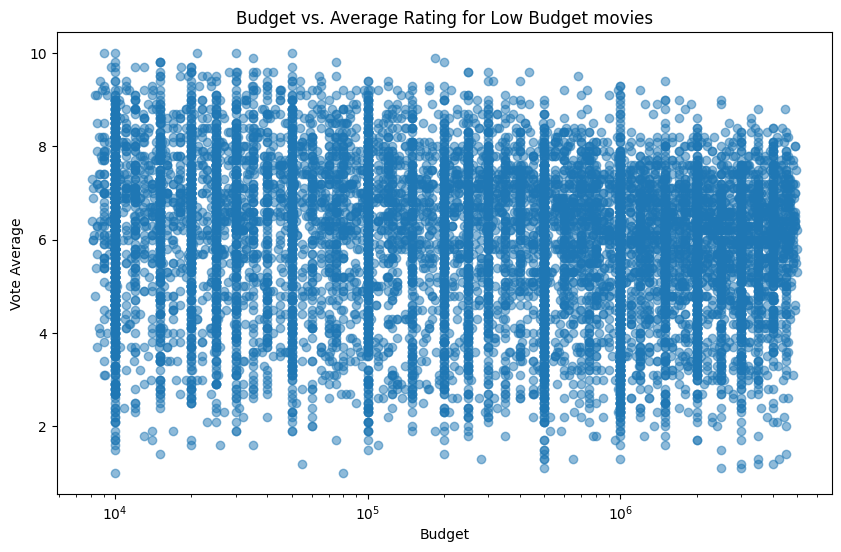

In [53]:
plt.figure(figsize=(10, 6))
plt.scatter(low_budget['budget'], low_budget['averageRating'], alpha=0.5)  # alpha controls transparency
plt.xlabel('Budget')
plt.ylabel('Vote Average')
plt.title('Budget vs. Average Rating for Low Budget movies')
plt.xscale('log') # Change x-axis to log scale for better visualization
plt.show()


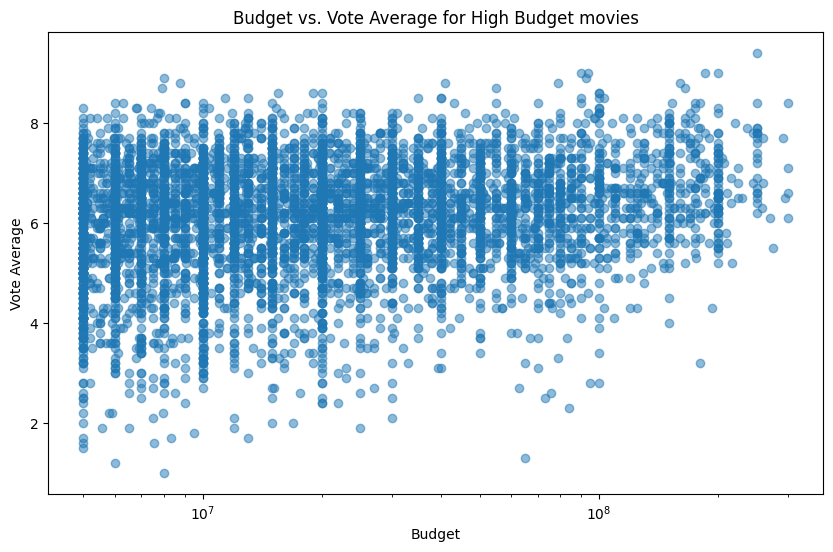

In [54]:
plt.figure(figsize=(10, 6))
plt.scatter(high_budget['budget'], high_budget['averageRating'], alpha=0.5)  # alpha controls transparency
plt.xlabel('Budget')
plt.ylabel('Vote Average')
plt.title('Budget vs. Vote Average for High Budget movies')
plt.xscale('log') # Change x-axis to log scale for better visualization
plt.show()

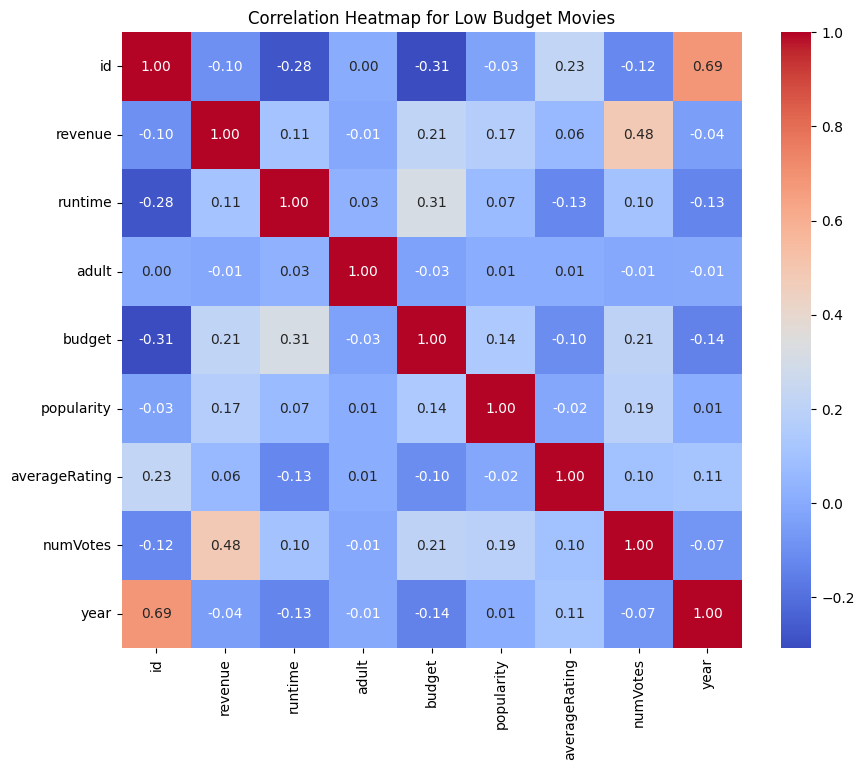

In [55]:
# prompt: for low budget, create correlation heatmap

# Assuming 'low_budget' DataFrame is already defined as in the previous code.

plt.figure(figsize=(10, 8))
sns.heatmap(low_budget.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap for Low Budget Movies')
plt.show()


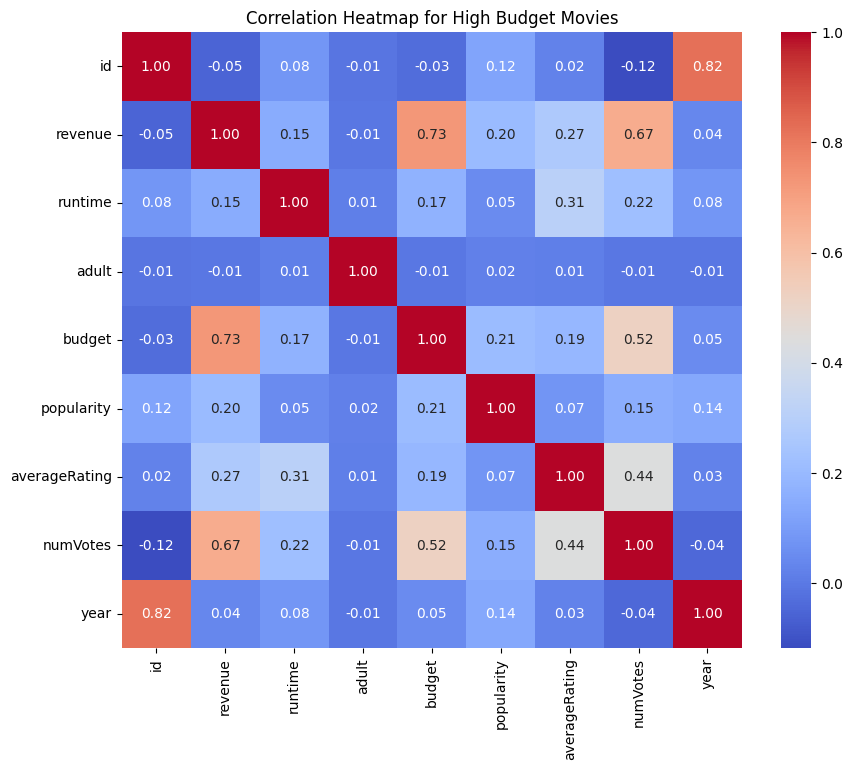

In [56]:

plt.figure(figsize=(10, 8))
sns.heatmap(high_budget.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap for High Budget Movies')
plt.show()

## Regression

$Avg Rating = \beta_0 + \beta_1Budget + \beta_2\text{Num of ratings} + \epsilon$

['Science Fiction',
 'Drama',
 'Mystery',
 'Documentary',
 'Fantasy',
 'Adventure',
 'TV Movie',
 'History',
 'War',
 'Family',
 'Music',
 'Animation',
 'Crime',
 'Thriller',
 'Horror',
 'Action',
 'Romance',
 'Comedy',
 'Western']

In [ ]:
genre_groups = {
    "Action & Thrills": ["Action", "Thriller", "Crime", "War", "Western"],
    "Fantasy & Sci-Fi": ["Science Fiction", "Fantasy", "Mystery", "Horror", "Animation"],
    "Drama & Emotional Storytelling": ["Drama", "Romance", "Family", "History", "Music"],
    "Lighthearted & Feel-Good": ["Comedy", "TV Movie", "Family", "Music"],
    "Reality & Non-Fiction": ["Documentary", "History", "War"]
}

In [ ]:
for genre_group, genres in genre_groups.items():
    df[genre_group] = df['genres'].str.contains('|'.join(genres), regex=True, na=False).astype(int)


In [ ]:
df.head()

,id,title,release_date,revenue,runtime,adult,budget,imdb_id,original_language,original_title,overview,popularity,genres,production_companies,production_countries,averageRating,numVotes,year,Science Fiction,Drama,Mystery,Documentary,Fantasy,Adventure,TV Movie,History,War,Family,Music,Animation,Crime,Thriller,Horror,Action,Romance,Comedy,Western
0,27205,Inception,2010-07-15,825532764,148,False,160000000,tt1375666,en,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America",8.8,2611469,2010.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
1,157336,Interstellar,2014-11-05,701729206,169,False,165000000,tt0816692,en,Interstellar,The adventures of a group of explorers who mak...,140.241,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",8.7,2193642,2014.0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,155,The Dark Knight,2008-07-16,1004558444,152,False,185000000,tt0468569,en,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.643,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America",9.0,2942753,2008.0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0
3,19995,Avatar,2009-12-15,2923706026,162,False,237000000,tt0499549,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.932,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom",7.9,1408115,2009.0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0
4,24428,The Avengers,2012-04-25,1518815515,143,False,220000000,tt0848228,en,The Avengers,When an unexpected enemy emerges and threatens...,98.082,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,8.0,1482940,2012.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
import statsmodels.api as sm

Y = "averageRating"
features = ['numVotes'] + unique_genres_list

X = df[features]
X = sm.add_constant(X)

model = sm.OLS(df[Y], X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:          averageRating   R-squared:                       0.267
Model:                            OLS   Adj. R-squared:                  0.266
Method:                 Least Squares   F-statistic:                     307.3
Date:                Wed, 26 Feb 2025   Prob (F-statistic):               0.00
Time:                        00:16:07   Log-Likelihood:                -27593.
No. Observations:               16880   AIC:                         5.523e+04
Df Residuals:                   16859   BIC:                         5.539e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               5.9144      0.025    2

In [1]:
df.budget.soty_val

NameError: name 'df' is not defined